Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.


no_of_asset_classes = 5
no_of_observations = 500

In [3]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 2000

In [4]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [5]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_Sum= np.sum(random_asset_weights)
    random_asset_weights= random_asset_weights/random_asset_Sum
    return np.asmatrix(random_asset_weights) 

get_random_asset_weights(no_of_asset_classes)

matrix([[0.26478219, 0.11670707, 0.02349743, 0.30306495, 0.29194836]])

In [6]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means.T
    #portfolio_mean = #todo second line if needed.
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T )
    #portfolio_standard_deviation = #todo second line if needed.
    portfolio_sharpe_ratio = portfolio_mean/portfolio_standard_deviation
    
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [7]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes=no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    
    e_r, volatility, sr = get_portfolio_statistics(
        asset_weights=random_asset_weights,
        matrix_of_return_values=matrix_of_return_values
    )
    portfolio_means.append(e_r.item())
    portfolio_standard_deviations.append(volatility.item())
    portfolio_sharpe_ratios.append(sr.item())

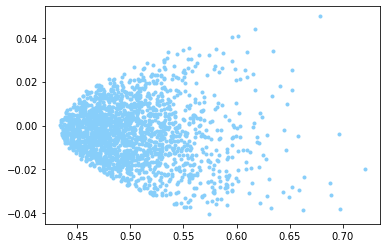

In [8]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [9]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = np.argmax(portfolio_sharpe_ratios)

In [10]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.05935416 0.00312041 0.706112   0.00297524 0.22843818]]
0.07335000101224347


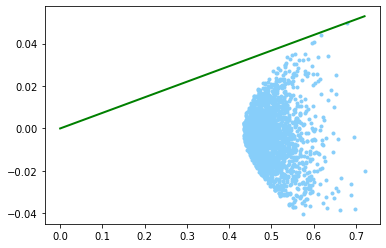

In [11]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [12]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

We'll use the value 0 for Risk-free. If we wish to incorporate it in our Sharpe ratio calculation, we must remove the free risk return from our predicted portfolio returns. That is to say The sharp ratio will be SR = Expected Asset Return - Free Risk Return / Asset Standard Deviation if portfolio mean = np.dot asset weights, asset means - Rf.